In [3]:
# importing the nessecary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading the data
df = pd.read_csv("CustomerChurn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Getting an overview of data

In [5]:
df.shape

(7043, 21)

In [6]:
# checking the columns names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking the dtypes of the columns. For this we have two ways 1. df.dtypes, 2. df.info()
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Obervations:
1.  If we check the dataframe and then compare the values of each columns to columns dtype, we find that the TotalCharges column contains numeric data but its dtype is object.
2. The possible reason might be that data is entered in the csv file in format like "23.89". Its is a invalid data because its look like numric type but pandas will treat it as a object type or we can  say string type. And If there are any null-values in that columns pandas we treat them as not null. It may be possible that null values are present in that column.

In [9]:
# Changing the dtype of the column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = "coerce")

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
# Checing the statistical measures of the numeric columns
df.describe()  # The seniorcitizen column have values 0&1 which correspends to No & Yes. So, we can ignore its measures.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### From these statistical measures we can get following insights:
1. Almost 75% people have a tenure of less that 55 months.
2. Only 25% people's are paying monthly charges more than 89$.


## Data Cleaning

In [12]:
#Detecting the missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# Calculating missing % for each col (Optinal step)
(df.isna().sum() / len(df)) * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

#### There are only 11 or we can say 0.15% to total missing values in the whole dataframe. So, we can drop them.

In [14]:
df.dropna(inplace = True)

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.drop(columns = "customerID", axis = 1, inplace = True)

## Analysis :

### Univariate Analysis

In [17]:
new_df = df.copy() # making a copy of df so that any changes that we will do does not reflect in the original df.

In [18]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [20]:
# Ploting the distribution(graph) of each column w.r.t to target column

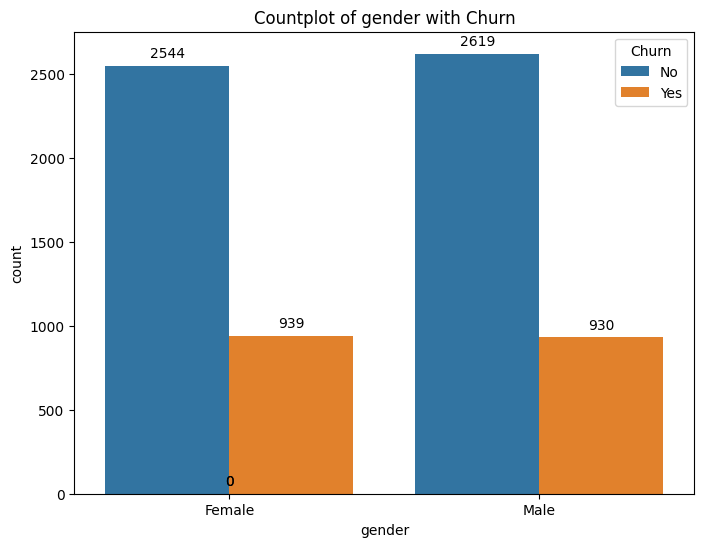

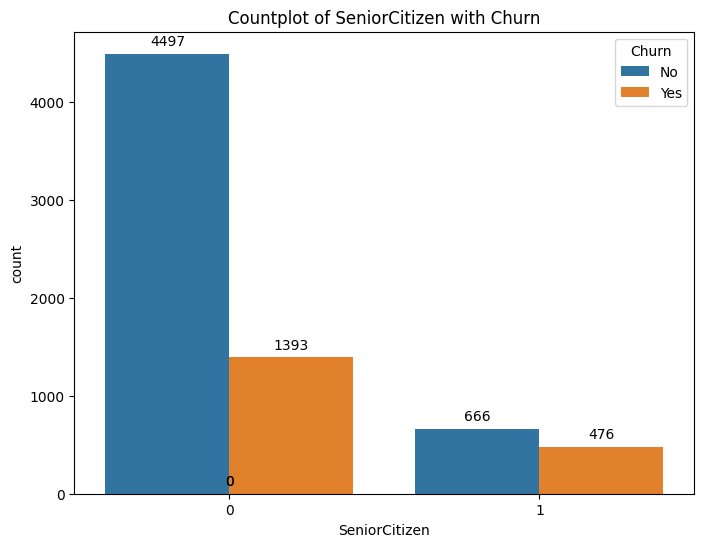

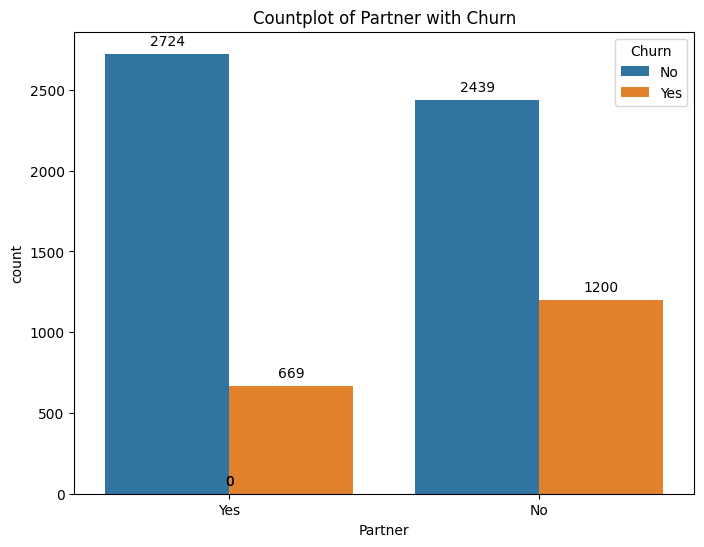

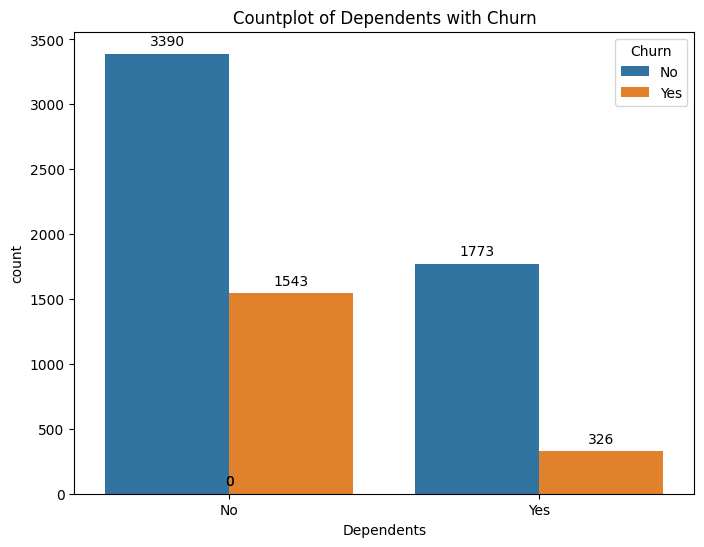

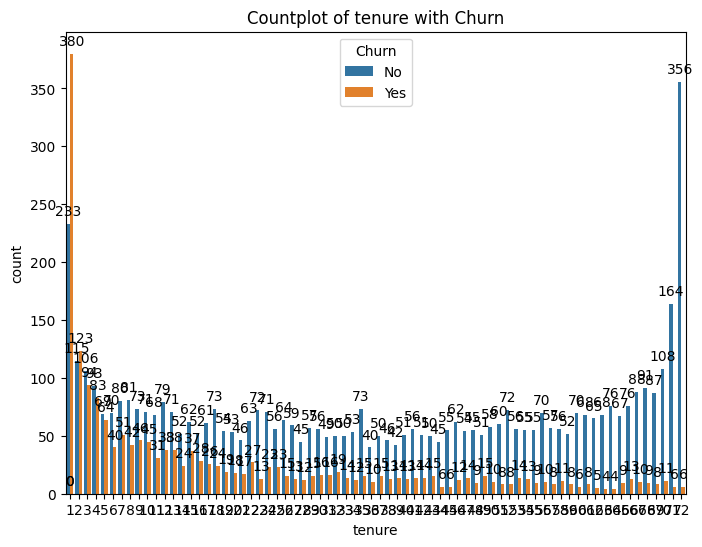

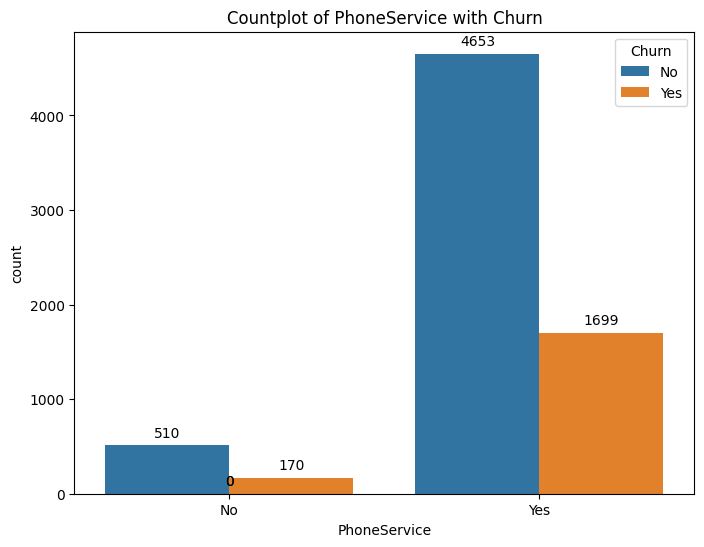

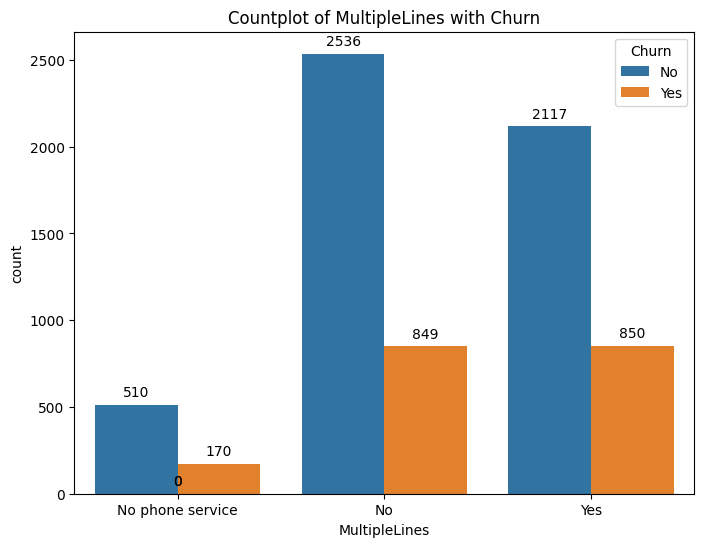

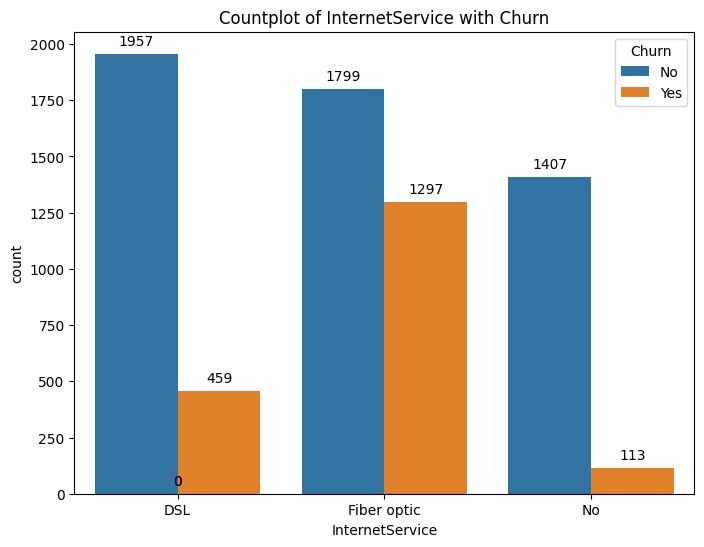

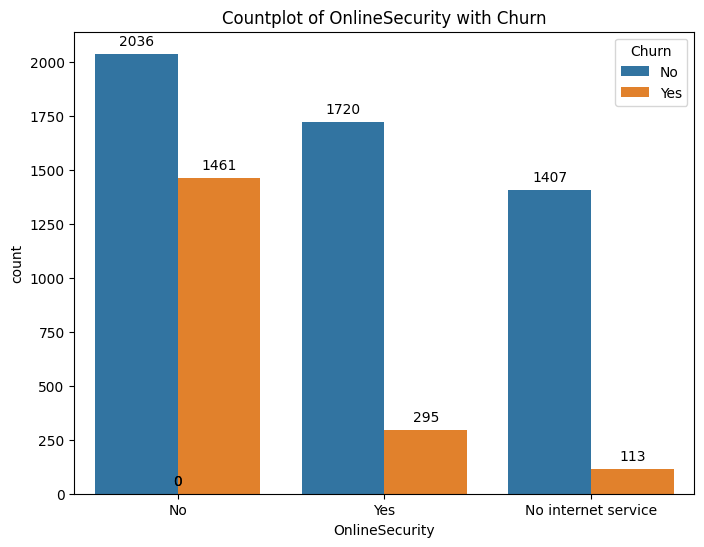

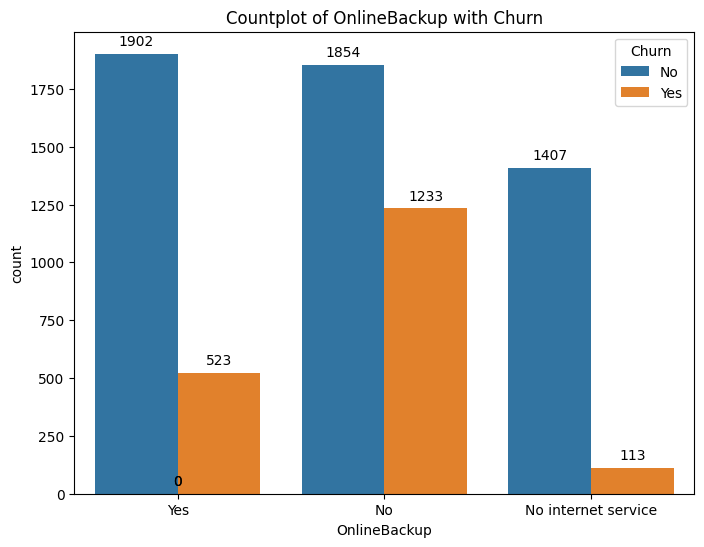

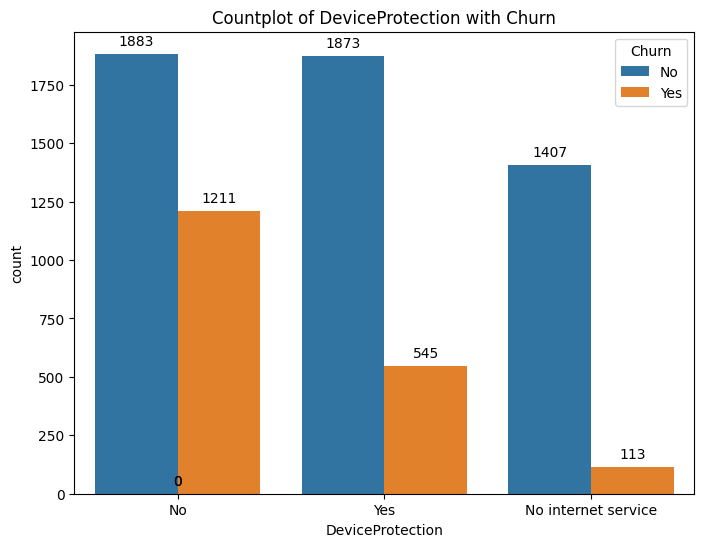

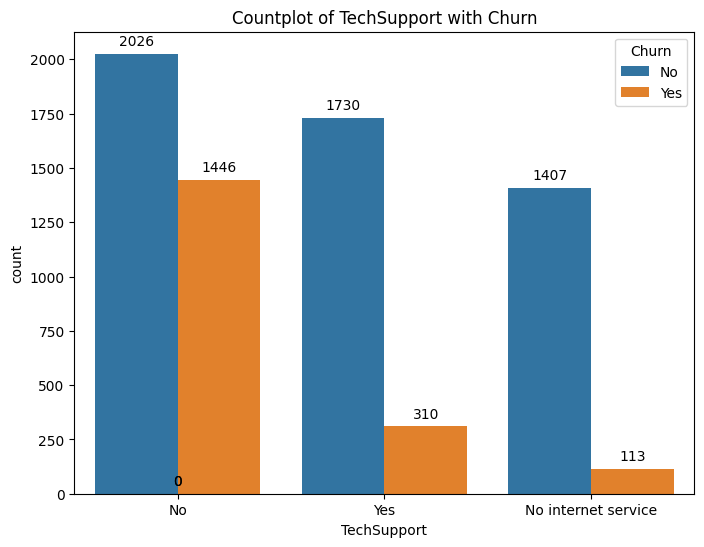

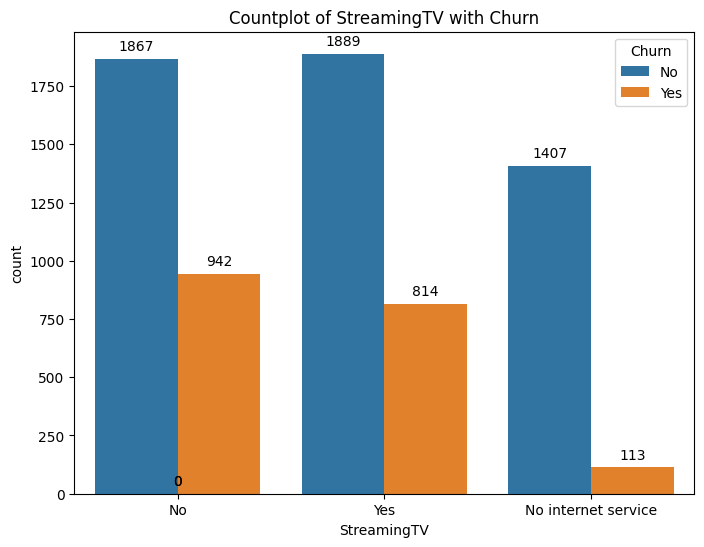

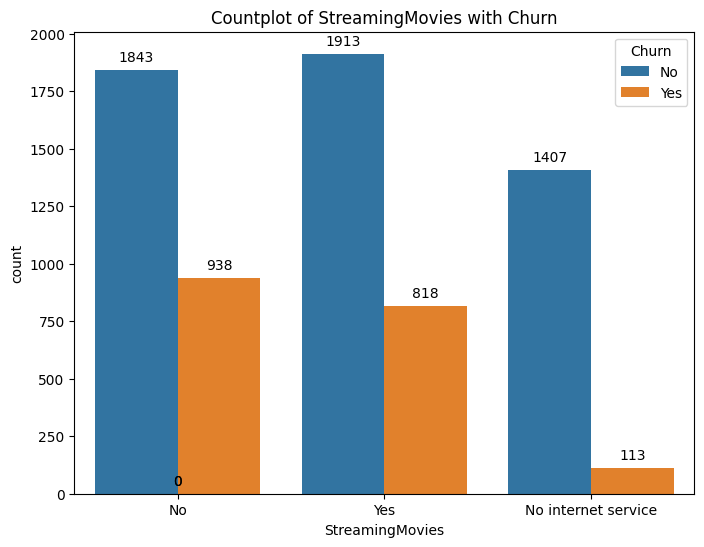

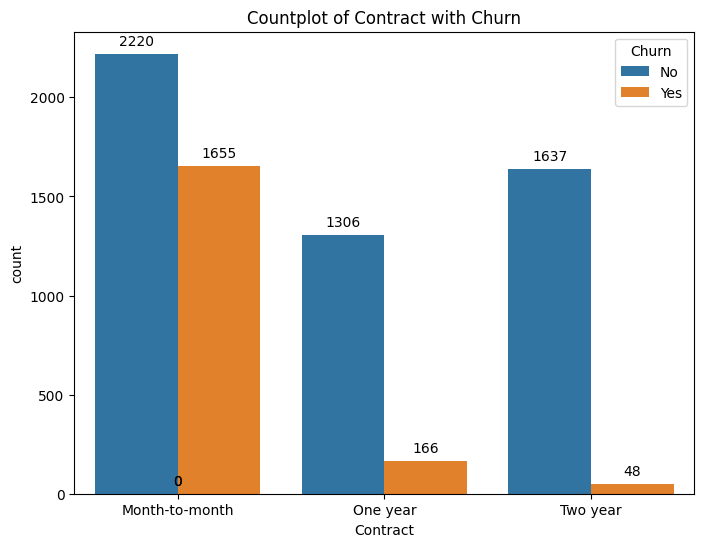

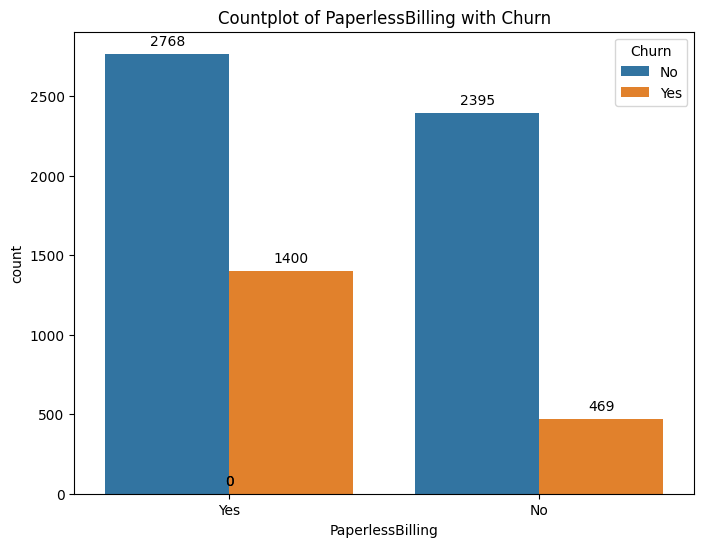

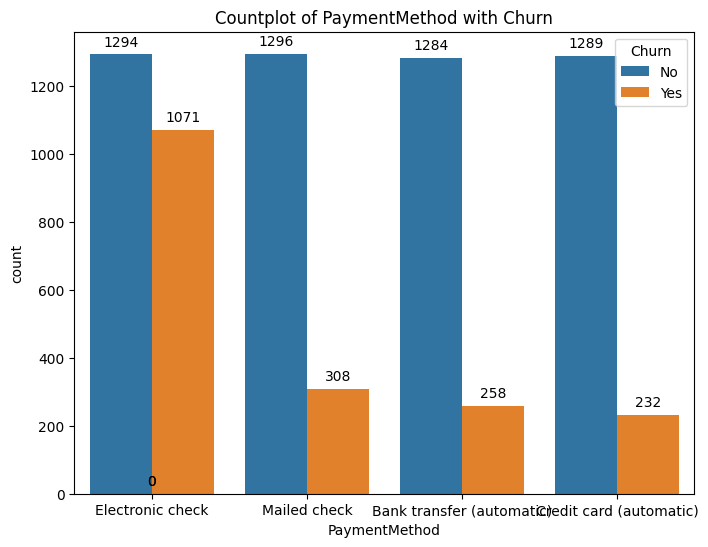

In [21]:
# Loop through each column
for i, col in enumerate(new_df.drop(columns=["MonthlyCharges", "TotalCharges", "Churn"])):
    plt.figure(i, figsize = (8, 6))
    ax = sns.countplot(data=new_df, x=col, hue="Churn")

    # Add the exact counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format the label as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of each bar
            ha = 'center', va = 'center',  # Center align
            xytext = (0, 9),  # Distance of the label from the bar
            textcoords = 'offset points'  # Positioning relative to the point
        )
    
    plt.title(f'Countplot of {col} with Churn')
    plt.show()


In [22]:
new_df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

#### The plot for the tenure column is overlapping becuase there are multiple different values in the columns. Thus we need to  convert these values into bins to get a clear plot

In [23]:
# Get the max tenure
print(new_df['tenure'].max()) 

72


In [24]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [25]:
new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [26]:
# now we can drop the tenure column
new_df.drop('tenure', axis = 1, inplace = True)

In [27]:
new_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


<Axes: xlabel='tenure_group', ylabel='count'>

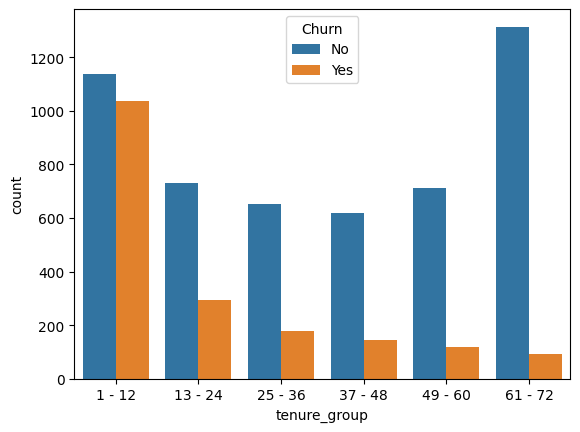

In [28]:
sns.countplot(data = new_df, x = "tenure_group", hue = "Churn" )

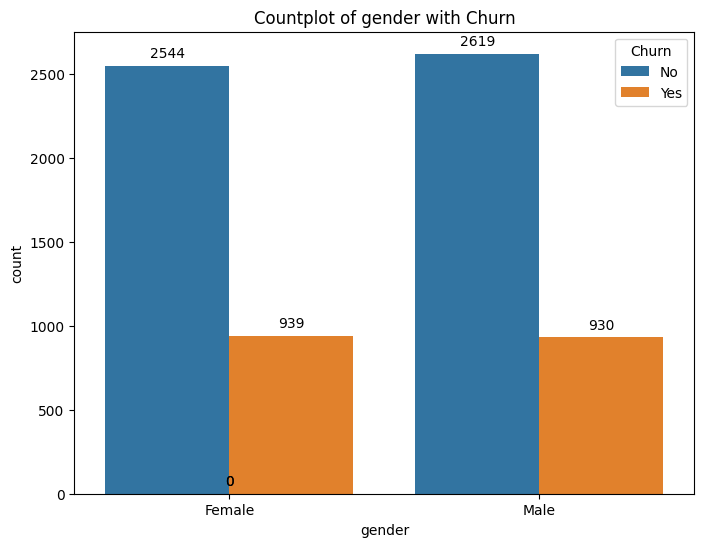

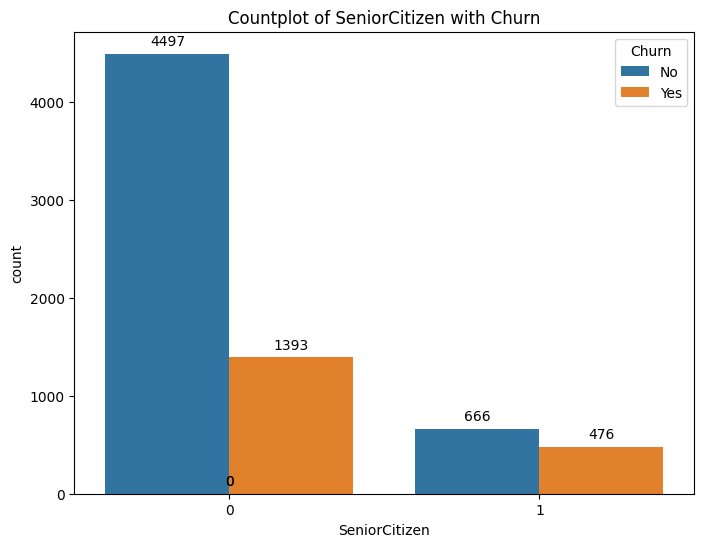

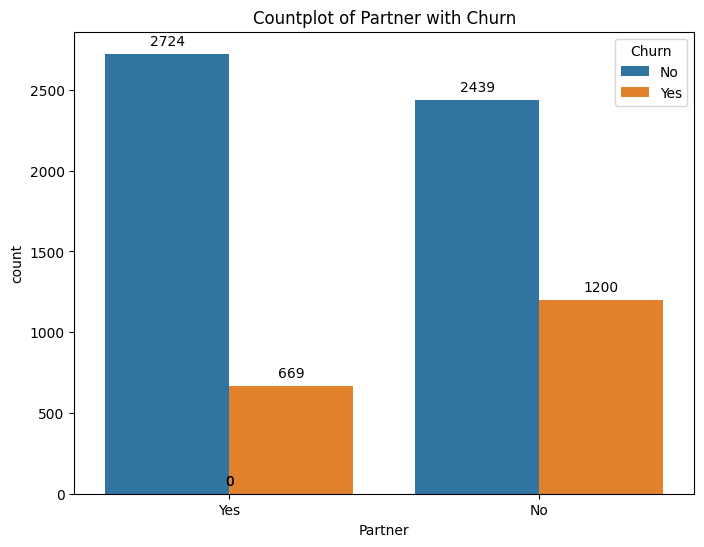

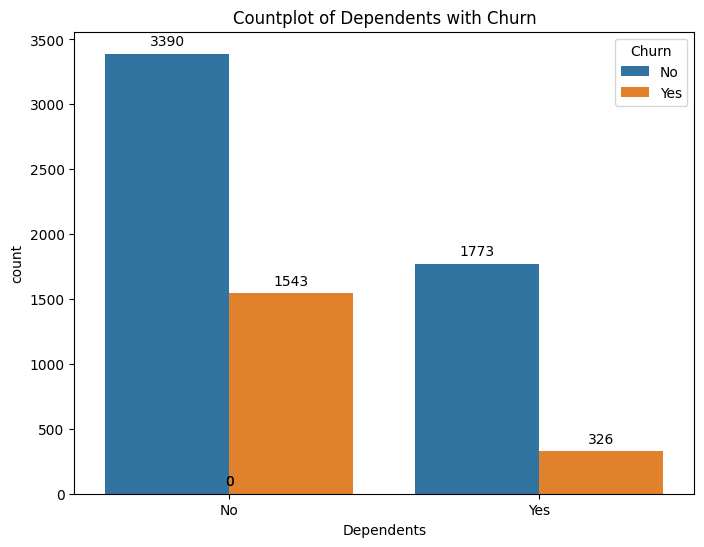

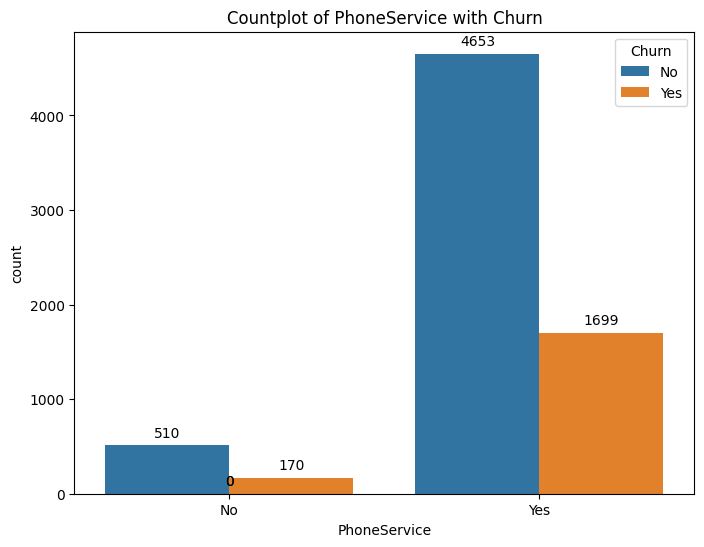

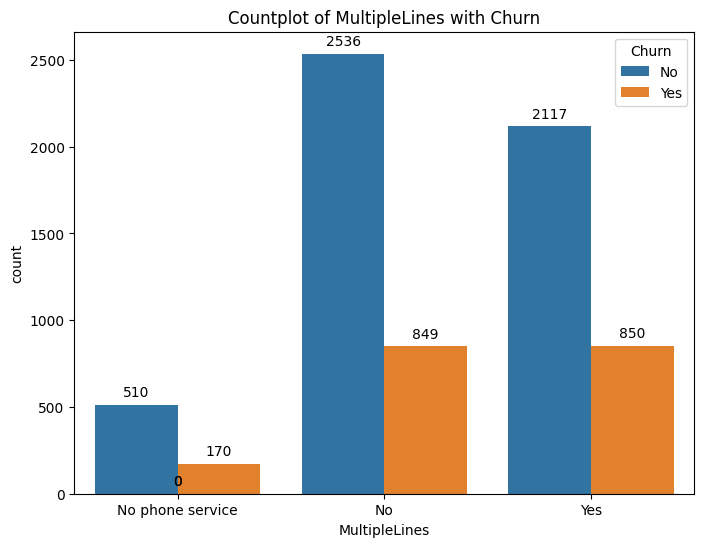

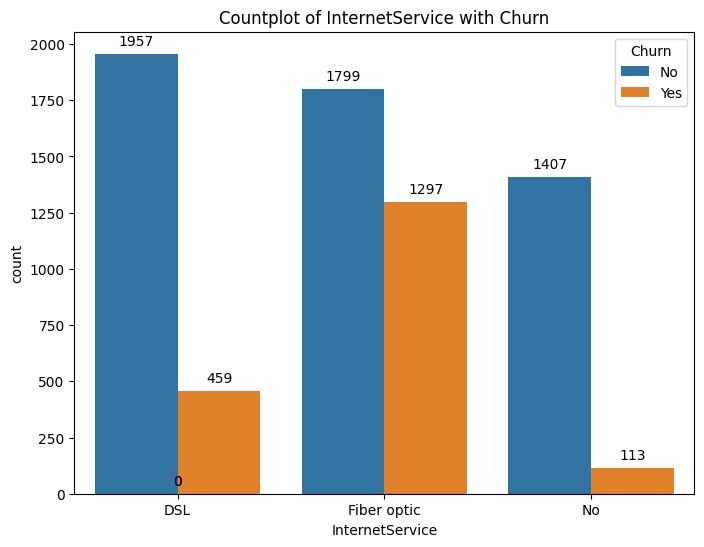

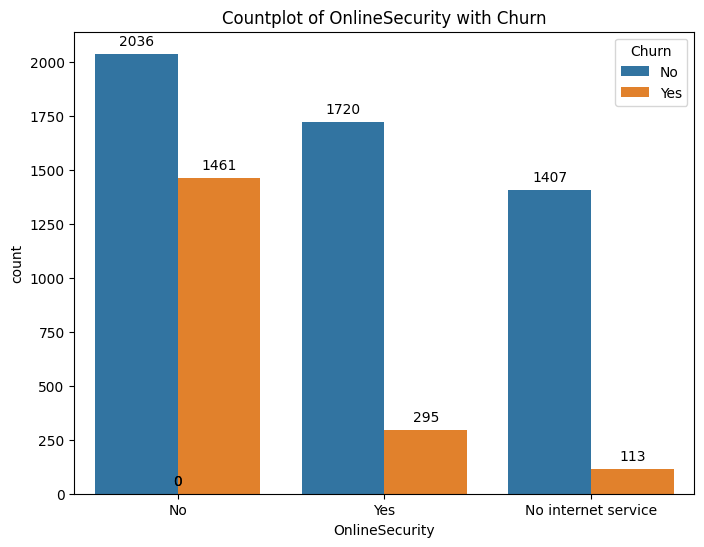

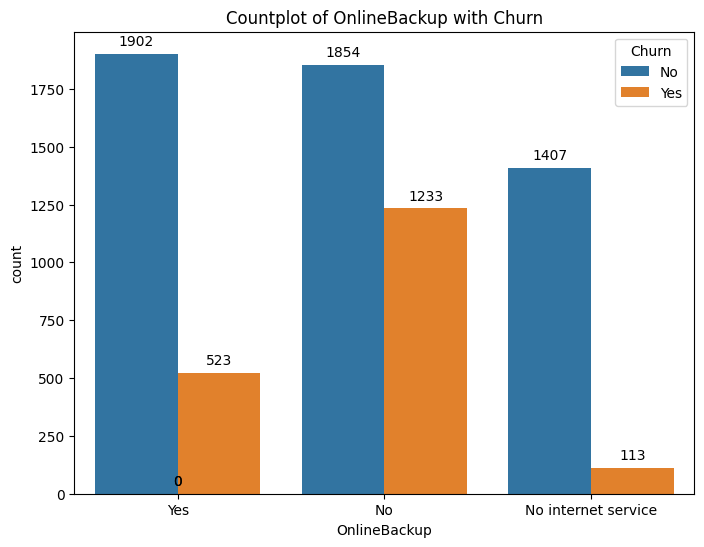

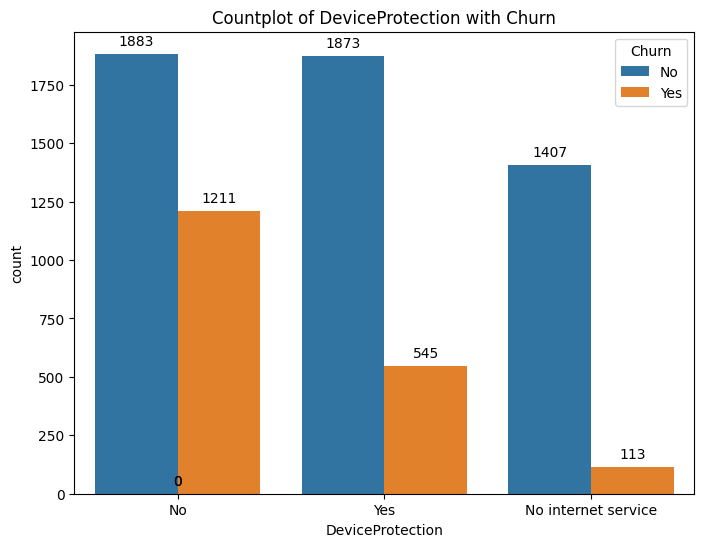

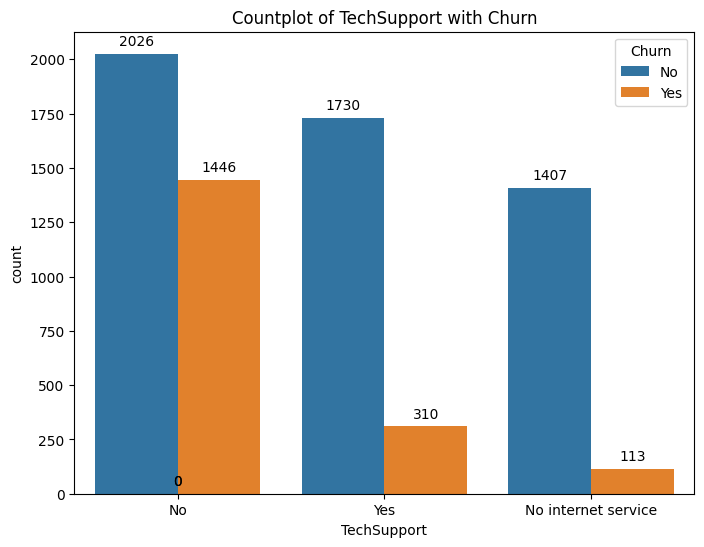

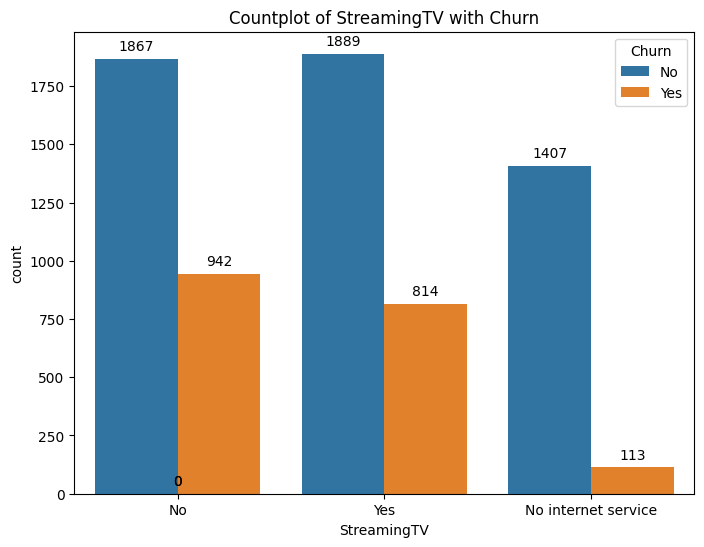

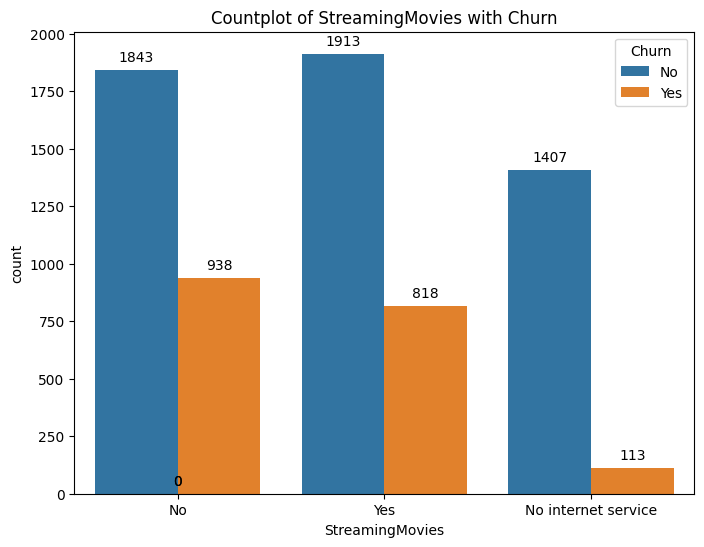

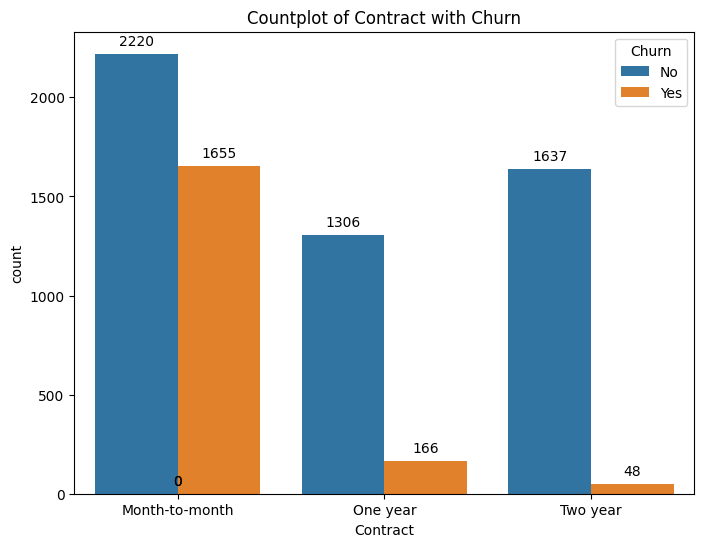

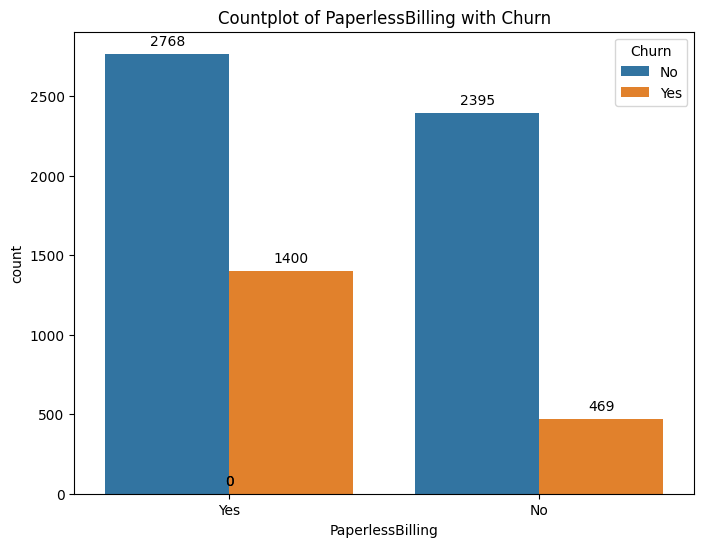

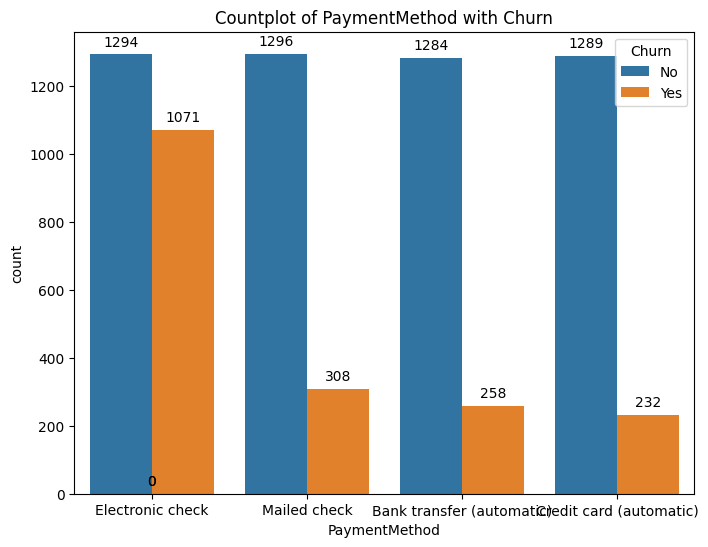

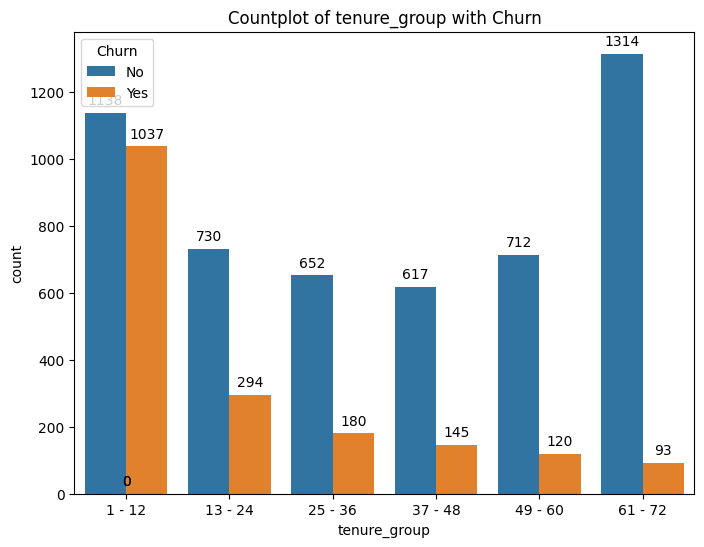

In [29]:
#Following is the python code which create countplots just like above but it also print the count of each category.
for i, col in enumerate(new_df.drop(columns=["MonthlyCharges", "TotalCharges", "Churn"])):
    plt.figure(i, figsize = (8, 6))
    ax = sns.countplot(data=new_df, x=col, hue="Churn")

    # Add the exact counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format the label as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of each bar
            ha = 'center', va = 'center',  # Center align
            xytext = (0, 9),  # Distance of the label from the bar
            textcoords = 'offset points'  # Positioning relative to the point
        )
    
    plt.title(f'Countplot of {col} with Churn')
    plt.show()

### Insights from univariate analysis :
1. Almost 42% Senior citizen churned.
2.  32% Non-partner's gets churned.
3. 41% user's who use fibre optic Internet service churned.
4. 41% user's churned because of no tech-support.
5. 42% of people who have month-to-month Contract churned.
6. 43% people who uses electronic check as a payment method gets churned.
7. People in the tenure of 1 to 12 months churn more, almost 47%.

### Bivariate analysis

#### Bivariate analysis refers to performing visualization and analysis on the combinations of two feature(columns).  There are 20 columns in the dataframe if we rank the first column as 1, second columns as 2 then the total combinations we have will range from (1,2), (1,3), (1,4)......(20,18),(20,19). We can choose any combinatio for our wish. But making combinations of the columns which gives us insights in the univariate analysis, then we can get more deeper insights. E.g seniorcitizen columns provide us insight so we can take the combination as (seniorcitizen, gender) to preform univatie analysis.

In [30]:
#Creating a new df contains only the data of churn = 1/yes
churn_yes = new_df.loc[new_df['Churn'] == "Yes"]
churn_yes.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,49 - 60


In [31]:
# Python function to print the plot of two columns w.r.t the count of churn customers.
def bivarite_plot(df, column1, column2, size):
    plt.figure(figsize = size)
    ax = sns.countplot(data = df, x = column1, hue = column2)
    
     # Add the exact counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format the label as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of each bar
            ha = 'center', va = 'center',  # Center align
            xytext = (0, 9),  # Distance of the label from the bar
            textcoords = 'offset points'  # Positioning relative to the point
        )
        
    plt.title(f"Churn by {column2} Status and {column2}")
    plt.ylabel("Count of churned customers")
    plt.xlabel(column1)
    plt.show()

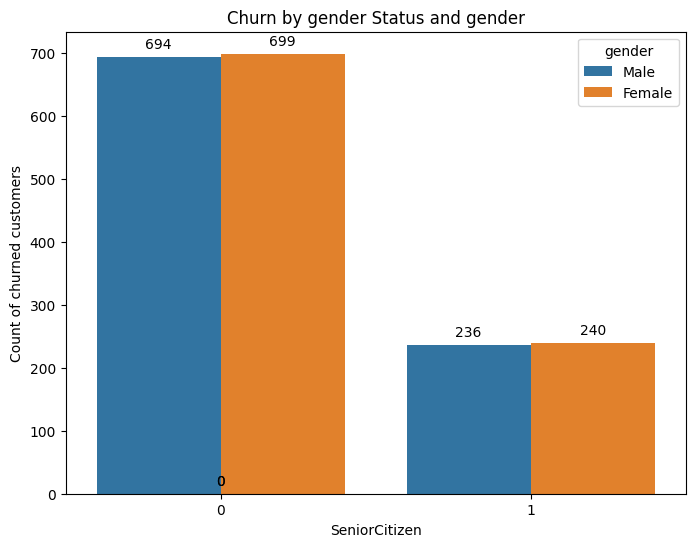

In [32]:
bivarite_plot(churn_yes, "SeniorCitizen", "gender", (8, 6))

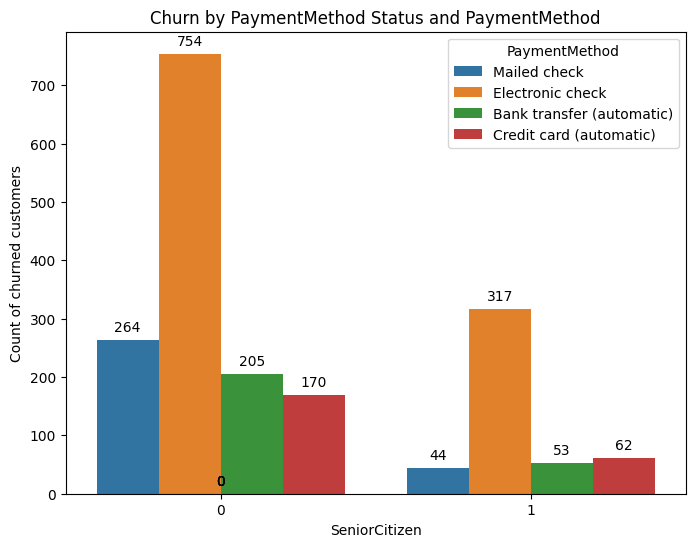

In [33]:
bivarite_plot(churn_yes, "SeniorCitizen", "PaymentMethod", (8, 6))

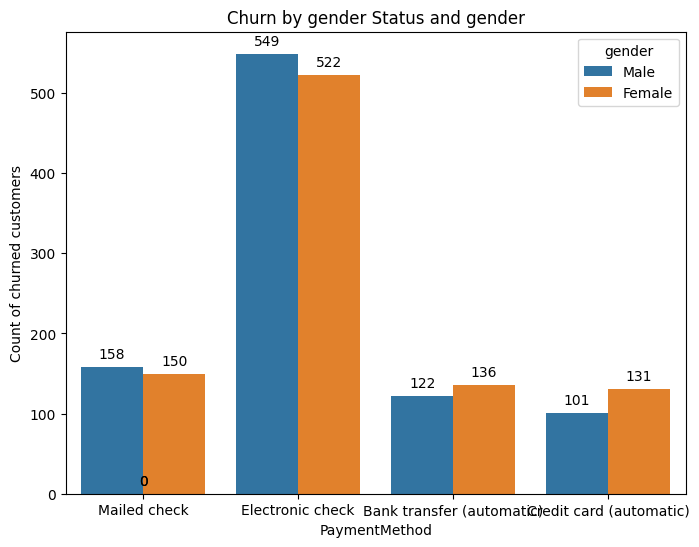

In [34]:
bivarite_plot(churn_yes, "PaymentMethod", "gender", (8, 6))

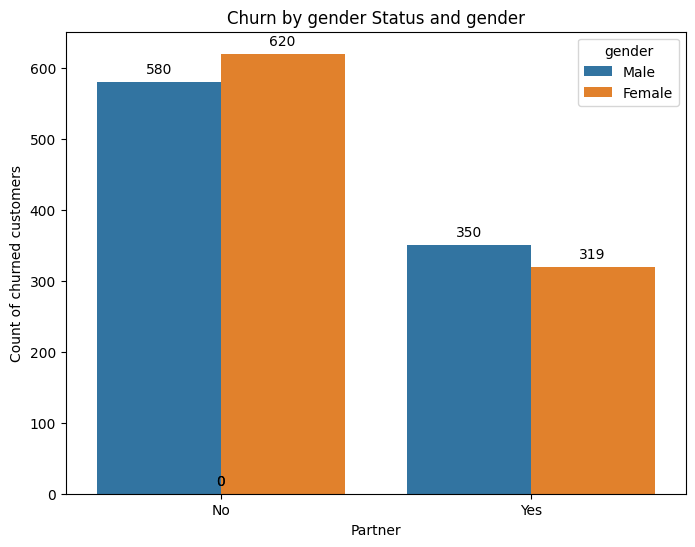

In [35]:
bivarite_plot(churn_yes, "Partner", "gender", (8,6))

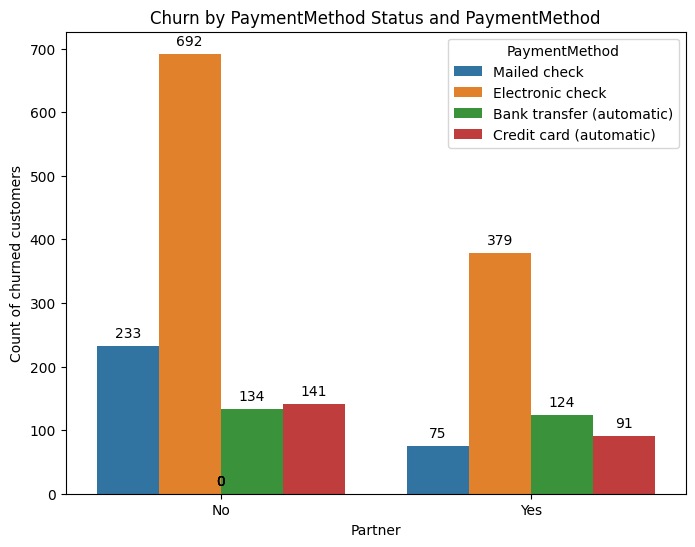

In [36]:
bivarite_plot(churn_yes, "Partner", "PaymentMethod", (8,6))

### Insights from Bivariate analysis:
1. 56% Females using credit card churned.
2. More females non partner's churned.
3.Non- psrtner's using mailed check churned more.

### Numrical analysis

In [37]:
new_df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object

In [38]:
# we have to numerical columns to analysis them we need to convert the target columns to numeric.
new_df["Churn"] = new_df["Churn"].map({"No" : 0, "Yes" : 1})

In [39]:
new_df["Churn"].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [40]:
# plotting seaborn kernal density plot for preforming numrical analysis on monthly charges and total charges columns

C:\Users\Harshit\AppData\Local\Temp\ipykernel_13716\2772674457.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 0) ],
C:\Users\Harshit\AppData\Local\Temp\ipykernel_13716\2772674457.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

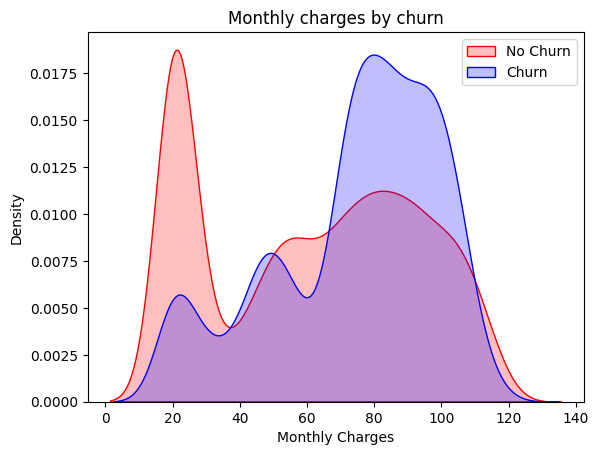

In [41]:
Mth = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

#### Insight -> For higher monthly charges more will be the churners.

C:\Users\Harshit\AppData\Local\Temp\ipykernel_13716\2870533862.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tth = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"] == 0) ],
C:\Users\Harshit\AppData\Local\Temp\ipykernel_13716\2870533862.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tth = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

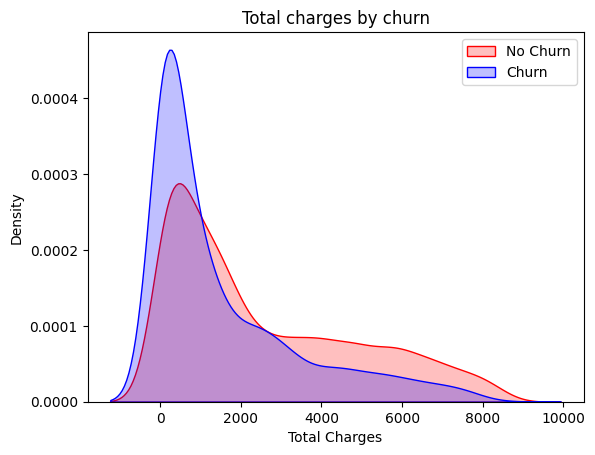

In [42]:
tth = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"] == 0) ],
                color="Red", shade = True)
tth = sns.kdeplot(new_df.TotalCharges[(new_df["Churn"] == 1) ],
                ax =tth, color="Blue", shade= True)
tth.legend(["No Churn","Churn"],loc='upper right')
tth.set_ylabel('Density')
tth.set_xlabel('Total Charges')
tth.set_title('Total charges by churn')

#### Insight ->
Surperisingly for lower total charges there are high no of churners. Total charges means times monthly charges paid in a one complete tenure. For e.g. if monthly charges are high and the tenure is smaller then evetually totalcharges will become lower if we compare with same amount of monthly charges paid for a long tenure. So the possible reason might be people paying higher monthly chargers for smaller tenure are more likey churn.

In [43]:
# Converting all the categorical cols to numeric.
new_df_num = pd.get_dummies(new_df)

In [44]:
# Ploting a correlat

<Axes: >

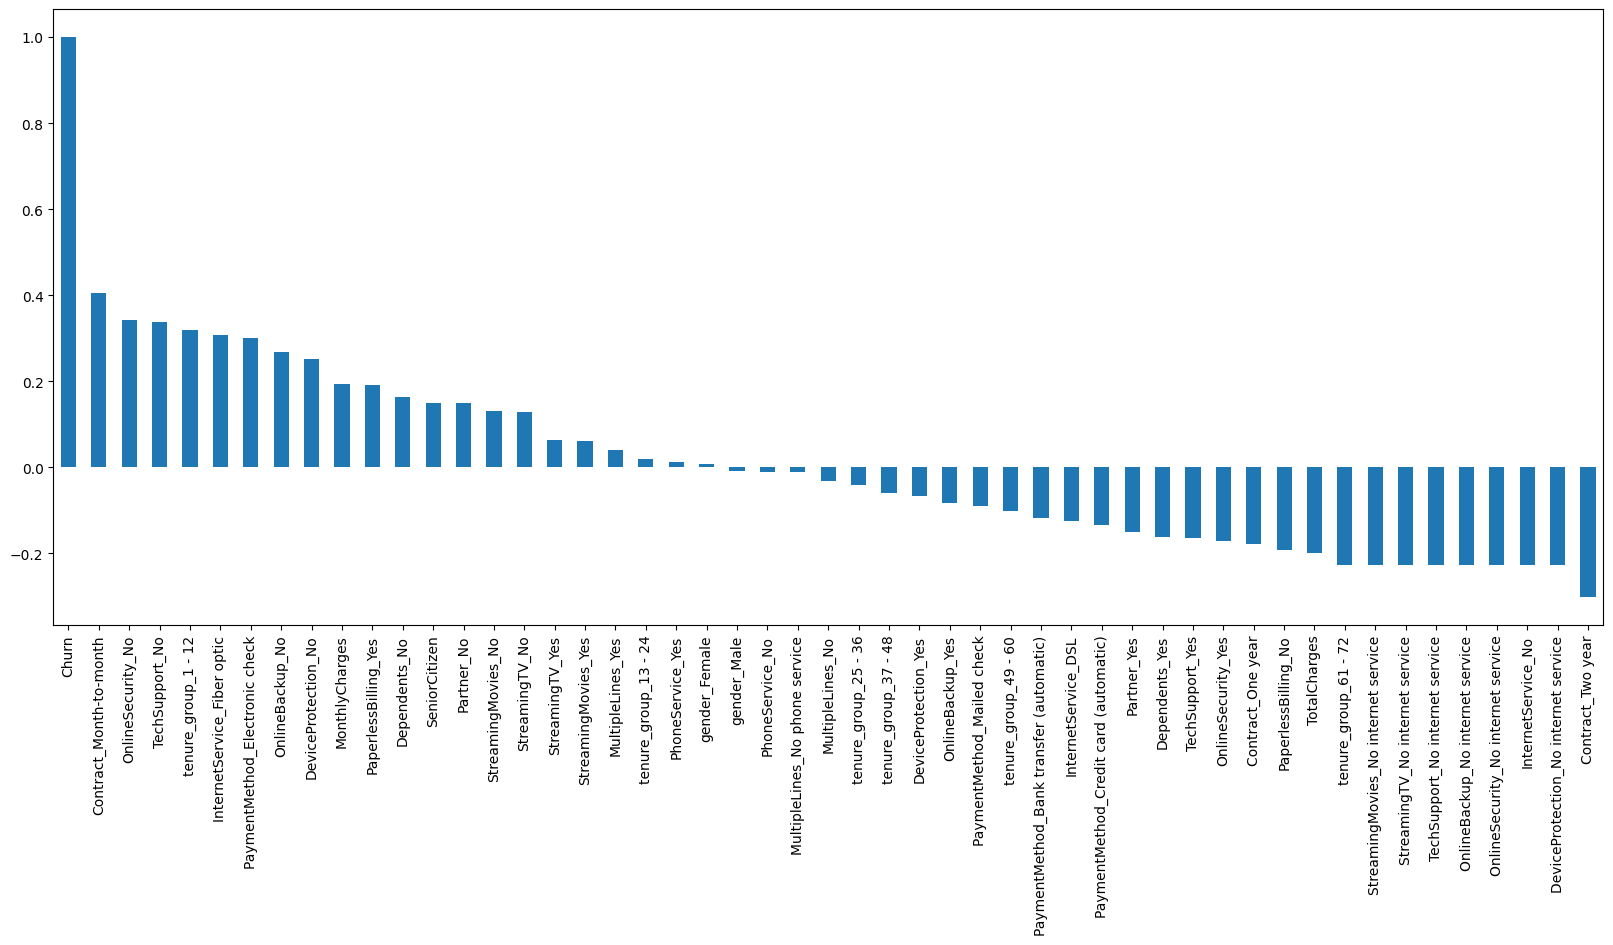

In [46]:
plt.figure(figsize = (20,8))
new_df_num.corr()['Churn'].sort_values(ascending = False).plot(kind = "bar")